In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import descartes

In [20]:
user='S'

if user=='S':
    mandat_dep=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/liste_mandat.csv")#on récupère le csv de la liste des mandats
    df_depu=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/listeDepute_complete.csv")

if user=='G':
    mandat_dep=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/liste_mandatdef.csv") 
    df_depu=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/listeDepute_complete.csv")


In [21]:
debut_mandat=[]
for dates in mandat_dep["Mandat"]:
    dates=str(dates).split()
    debut_mandat.append(' '.join(dates[1:4]))
    
mandat_dep["Debut Mandat"]=np.array(debut_mandat)
mandat_dep.head()

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Nom,Debut Mandat
0,0,Territoire-de-Belfort,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,Damien Meslot,19 juin 2002
1,0,Territoire-de-Belfort,Union pour un mouvement populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,Damien Meslot,20 juin 2007
2,0,Territoire-de-Belfort,Union pour un mouvement populaire,XIVe législature,Du 20 juin 2012 au 20 juin 2017,Cinquième République - Assemblée nationale,Damien Meslot,20 juin 2012
3,0,Ille-et-Vilaine,La République en Marche,XVe législature (Législature en cours),Depuis le 21 juin 2017 (mandat en cours),Cinquième République - Assemblée nationale,Christine Cloarec-Le Nabour,le 21 juin
4,0,Ardèche,Socialiste,XIe législature,Du 1er juin 1997 au 18 juin 2002,Cinquième République - Assemblée nationale,Pascal Terrasse,1er juin 1997


<b> TRANSTYPAGE !!! (Je suis heureux que ça ait marché) 

In [22]:
df_depu[["Nom","Né le"]].head(2)
mandat_dep[["Nom","Debut Mandat"]].head(2)
age_dep=mandat_dep.set_index('Nom').join(df_depu[["Nom","Né le"]].set_index('Nom'), on='Nom')
dates=[]#je n'ai pas l'impression qu'on l'utilise
mandat_dep.reset_index()
mois={'janvier':1,'février':2, 'mars':3, 'avril':4, 'mai':5, 'juin':6, 'juillet':7, 'août':8, 'septembre':9, 'octobre':10, 'novembre':11, 'décembre':12}
def transtype_date(x):
    x=str(x)        
    date_texte=x.split() 
    if len(date_texte)>1 :
        if  date_texte[1] in (mois.keys()):
            if date_texte[0]=="1er":
                date_texte[0]='1'
            date_texte[1]=str(mois[date_texte[1]])
            date_nombre='/'.join(date_texte)
            return pd.to_datetime(date_nombre)
    else:
        return pd.NaT


age_dep["Date de naissance"]=age_dep["Né le"].apply(lambda x: transtype_date(x))
age_dep["Date debut mandat"]=age_dep["Debut Mandat"].apply(lambda x: transtype_date(x))
age_dep.head(2)

,Unnamed: 0,Département,Groupe,Législature,Mandat,Régime politique,Debut Mandat,Né le,Date de naissance,Date debut mandat
Nom,,,,,,,,,,
Damien Meslot,0,Territoire-de-Belfort,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,19 juin 2002,11 novembre 1964,1964-11-11,2002-06-19
Damien Meslot,0,Territoire-de-Belfort,Union pour un mouvement populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,20 juin 2007,11 novembre 1964,1964-11-11,2007-06-20


In [23]:
age_dep['age depute']=age_dep['Date debut mandat']-age_dep['Date de naissance']#on crée la variable age au debut du mandat, en jour
age_dep['age en année']=age_dep['age depute'].apply(lambda x: float(x.days / 365.25))#et on la transforme en années
age_dep=age_dep[['Département','Groupe', 'Législature', 'Mandat', 'Régime politique', 'age en année']]
age_dep

,Département,Groupe,Législature,Mandat,Régime politique,age en année
Nom,,,,,,
Damien Meslot,Territoire-de-Belfort,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,37.601643
Damien Meslot,Territoire-de-Belfort,Union pour un mouvement populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,42.603696
Damien Meslot,Territoire-de-Belfort,Union pour un mouvement populaire,XIVe législature,Du 20 juin 2012 au 20 juin 2017,Cinquième République - Assemblée nationale,47.605749
Christine Cloarec-Le Nabour,Ille-et-Vilaine,La République en Marche,XVe législature (Législature en cours),Depuis le 21 juin 2017 (mandat en cours),Cinquième République - Assemblée nationale,NaN
Pascal Terrasse,Ardèche,Socialiste,XIe législature,Du 1er juin 1997 au 18 juin 2002,Cinquième République - Assemblée nationale,32.197125
Pascal Terrasse,Ardèche,Socialiste,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,37.645448
Manuel Aeschlimann,Hauts-de-Seine,Union pour la majorité présidentielle,XIIe législature,Du 19 juin 2002 au 19 juin 2007,Cinquième République - Assemblée nationale,37.656400
Manuel Aeschlimann,Hauts-de-Seine,Union pour un Mouvement Populaire,XIIIe législature,Du 20 juin 2007 au 19 juin 2012,Cinquième République - Assemblée nationale,42.658453
David Lorion,La Réunion,Les Républicains,XVe législature (Législature en cours),Depuis le 21 juin 2017 (mandat en cours),Cinquième République - Assemblée nationale,NaN


In [11]:
mandat_dep.count()#on vérifie qu'il n'y a pas trop de manques

Unnamed: 0          36128
Département         35931
Groupe              32005
Législature         36128
Mandat              36128
Régime politique    36126
Nom                 36128
Debut Mandat        36128
dtype: int64

In [26]:
dep_possible=list(mandat_dep['Département'].unique())#une liste de tous les départements
dep_possible.remove(" Département d'élection inconnu")
dep_possible.remove(np.nan)

In [27]:
df=age_dep.reset_index()
w,x,y,z=[],[],[],[]
for dep in dep_possible :
    w+=[df[df['Département']==dep]['age en année'].mean()]#on prend la moyenne d'age dans le département
    x+=[len(df[df['Département']==dep])]#on compte le nombre total de mandat dans le département
    y+=[len(df[df['Département']==dep]['Nom'].unique())]#Puis le nombre de députés différent par dpt
    z+=[x[-1]/y[-1]] #Ceci est le nombre moyen de mandat par député
    
carac_dep_bis=np.array([w, x, y, z])#on crée un dataframe avec les informations
table_depmt = pd.DataFrame(carac_dep_bis, index=['age moyen des deputes', 'nombre_mandat', 'nombre député','nombre moyen de mandats par député'],columns=dep_possible)
table_depmt.head()



,Territoire-de-Belfort,Ille-et-Vilaine,Ardèche,Hauts-de-Seine,La Réunion,Puy-de-Dôme,Essonne,Haut-Rhin,Haute-Marne,Hautes-Pyrénées,...,Départements de l'Empire français aujourd'hui en Belgique,Mont-Blanc,Départements de l'Empire français aujourd'hui aux Pays-Bas,Départements de l'Empire français aujourd'hui en Allemagne,Saint-Domingue,Etranger,Départements de l'Empire français aujourd'hui en Suisse,Rhône-et-Loire,Départements de l'Empire français aujourd'hui au Luxembourg,Ile-de-France (Maurice)
age moyen des deputes,46.976129,47.333331,52.584768,54.076791,47.356341,49.266955,47.782325,49.510650,49.614406,47.610409,...,44.775862,43.130094,48.834702,51.882537,35.140657,38.944559,44.386286,36.502179,49.342574,38.561259
nombre_mandat,64.000000,572.000000,331.000000,184.000000,139.000000,475.000000,92.000000,325.000000,208.000000,251.000000,...,98.000000,48.000000,27.000000,31.000000,20.000000,2.000000,11.000000,20.000000,8.000000,2.000000
nombre député,27.000000,216.000000,132.000000,67.000000,50.000000,209.000000,38.000000,157.000000,94.000000,103.000000,...,83.000000,34.000000,26.000000,31.000000,15.000000,2.000000,10.000000,17.000000,7.000000,2.000000
nombre moyen de mandats par député,2.370370,2.648148,2.507576,2.746269,2.780000,2.272727,2.421053,2.070064,2.212766,2.436893,...,1.180723,1.411765,1.038462,1.000000,1.333333,1.000000,1.100000,1.176471,1.142857,1.000000


In [110]:
print(min(table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre député']>40]))
print(max(table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre député']>40]))
print((table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre député']>40]).mean())
print((table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre moyen de mandats par député']<2][table_depmt.loc['nombre député']>40]).count())

1.0
3.09375
2.290677795052528
5


In [111]:
table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre moyen de mandats par député']<2][table_depmt.loc['nombre député']>40]

 Allier                                                       1.974843
 Anciens départements d'Algérie                               1.526570
 Départements de l'Empire français aujourd'hui en Belgique    1.180723
 Départements de l'Empire français aujourd'hui en Italie      1.000000
 Meurthe                                                      1.986486
Name: nombre moyen de mandats par député, dtype: float64

Les valeurs les plus basses sont constituées par des départements qui ont appartenu peu de temps à la France, et où les occasions de se faire réélire ont donc été peu nombreuses.

In [112]:
table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre moyen de mandats par député']>2.5][table_depmt.loc['nombre député']>40]

 Alpes-Maritimes       2.570000
 Ardèche               2.507576
 Charente-Maritime     2.533333
 Haute-Savoie          2.827586
 Hauts-de-Seine        2.746269
 Ille-et-Vilaine       2.648148
 Indre-et-Loire        2.511450
 La Réunion            2.780000
 Landes                2.548077
 Loire-Atlantique      2.589286
 Manche                2.627119
 Meurthe-et-Moselle    2.567308
 Oise                  2.611111
 Orne                  2.510949
 Savoie                3.093750
 Seine-St-Denis        2.622642
 Tarn-et-Garonne       2.523810
 Val-de-Marne          2.770833
Name: nombre moyen de mandats par député, dtype: float64

Au contraire, les départements où il y a le plus de réélections ne semblent pas avoir de problèmes de ce type.

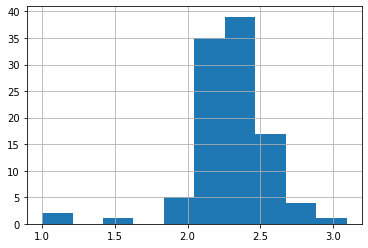

In [113]:
table_depmt.loc['nombre moyen de mandats par député'][table_depmt.loc['nombre député']>40].hist()

In [13]:
#récupération d'une carte des départements français
import requests
import tempfile
import zipfile


In [30]:
temporary_location = tempfile.gettempdir()
def download_unzip(url, dirname =temporary_location, destname = "borders"):#fonction qui dézippe
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref: 
        zip_ref.extractall(dirname + '/' + destname)
download_unzip('https://www.data.gouv.fr/fr/datasets/r/3096e551-c68d-40ce-8972-a228c94c0ad1')#l'URL où on trouve les départements

In [31]:
carte_departement = gpd.read_file(tempfile.gettempdir() + "/borders/departements-20140306-100m.dbf")#on va chercher le fichier là où on l'a stocké
carte_metrop = carte_departement.loc[0:95]#on enlève les départements d'outre-mer pour avoir une carte lisible


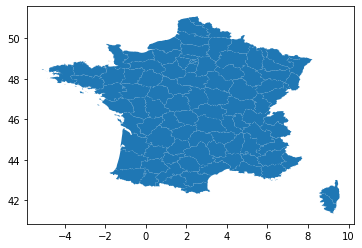

In [32]:
carte_metrop.plot()

In [114]:
table_depmt.columns=[i[1:] for i in table_depmt.columns]#on enlève l'espace devant le nom des départements

In [105]:
carte_metrop.set_index('nom', inplace=True)#on met le nom du département en index pour pouvoir joindre les bases

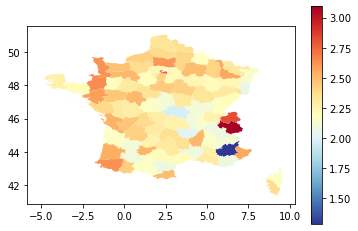

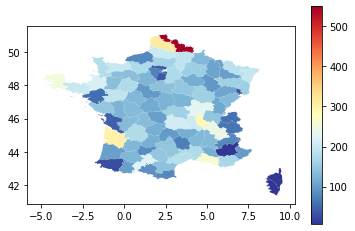

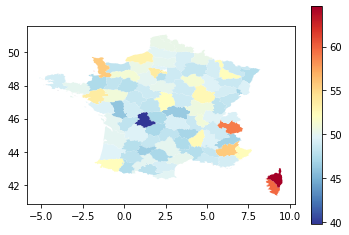

In [116]:
df = carte_metrop.merge(table_depmt.T, how = 'inner', left_index=True, right_index=True)#on transpose table pour avoir les départements en noms de lignes
df.plot(column = 'nombre moyen de mandats par député', cmap = 'RdYlBu_r', legend=True)#on crée des cartes
df.plot(column='nombre député', cmap = 'RdYlBu_r', legend=True)
df.plot(column='age moyen des deputes', cmap='RdYlBu_r', legend=True)

On s'occupe des régimes maintenant

In [34]:
reg_possible=list(mandat_dep['Régime politique'].unique())#une liste de tous les régimes
reg_possible.remove(np.nan)
df=age_dep.reset_index()
w,x,y,z=[],[],[],[]
for reg in reg_possible :
    w+=[df[df['Régime politique']==reg]['age en année'].mean()]#on prend la moyenne d'age dans ce régime
    x+=[len(df[df['Régime politique']==reg])]#on compte le nombre total de mandat dans le régime
    y+=[len(df[df['Régime politique']==reg]['Nom'].unique())]#Puis le nombre de députés différent
    z+=[x[-1]/y[-1]] #Ceci est le nombre moyen de mandat par député
    
carac_reg_bis=np.array([w, x, y, z])#on crée un dataframe avec les informations
table_reg = pd.DataFrame(carac_reg_bis, index=['age moyen des deputes', 'nombre_mandat', 'nombre député','nombre moyen de mandats par député'],columns=reg_possible)
table_reg.head()

,Cinquième République - Assemblée nationale,Quatrième République - Assemblée nationale,Gouvernement provisoire de la République française,Troisième République - Chambre des députés,Révolution,Assemblée Nationale,Second Empire - Corps législatif,Deuxième République,Monarchie de Juillet - Chambre des députés,Seconde Restauration - Chambre des députés des départements,Cent-Jours,Consulat et Premier Empire,Première Restauration
age moyen des deputes,53.299084,47.521094,45.659879,49.128003,39.919772,52.058448,51.301943,45.702348,49.385091,52.671292,48.294032,47.092943,50.843755
nombre_mandat,8319.000000,2002.000000,1224.000000,10626.000000,3083.000000,882.000000,1301.000000,1796.000000,3748.000000,2250.000000,650.000000,955.000000,248.000000
nombre député,3345.000000,1135.000000,738.000000,4297.000000,2161.000000,855.000000,612.000000,1349.000000,1462.000000,1172.000000,624.000000,925.000000,231.000000
nombre moyen de mandats par député,2.486996,1.763877,1.658537,2.472888,1.426654,1.031579,2.125817,1.331357,2.563611,1.919795,1.041667,1.032432,1.073593


In [56]:

import urllib#pour récupérer les données
import bs4#pour rendre lisibles les données
import re
def Scrap (url):
    req = urllib.request.Request(url)
    html = urllib.request.urlopen(req).read()
    page = bs4.BeautifulSoup(html, "lxml")
    return page
def ToDf (table) :
    Listgrossiere=pd.read_html(str(table))#on transforme le tableau en liste de dataframes
    listeDf=Listgrossiere[0]#on récupère le dataframe
    return listeDf
page=Scrap('https://fr.wikipedia.org/wiki/Liste_des_r%C3%A9gimes_fran%C3%A7ais')
table = page.find('table')#on récupère le seul tableau de la page qui liste des députés
listeReg=ToDf(table)

In [57]:
listeReg

Nom  \
                                                  Nom   
0                                Monarchie fédérative   
1                                   Monarchie féodale   
2                                   Monarchie absolue   
3                                   Monarchie absolue   
4                         Monarchie constitutionnelle   
5                         Monarchie constitutionnelle   
6                                 Première République   
7                                 Première République   
8                                 Première République   
9                                 Première République   
10                                Première République   
11                                Première République   
12  Commission consulaire du 11 novembre 1799 au 1...   
13        Consulat du 13 décembre 1799 au 2 août 1802   
14       Premier consul du 2 août 1802 au 18 mai 1804   
15                          Autoritarisme (1802–1804)   
16                                     Premier Empire   
17                              Première Restauration   
18                                         Cent-Jours   
19                               Seconde Restauration   
20                               Monarchie de Juillet   
21                                Deuxième République   
22                                Deuxième République   
23                                      Second Empire   
24                               Troisième République   
25                               Troisième République   
26       Assemblée nationale sous la IIIe (1875-1942)   
27                    Chambre des députés (1875-1942)   
28               France libre puis France Combattante   
29         Comité français de la Libération nationale   
30  Gouvernement provisoire de la République franç...   
31  Gouvernement provisoire de la République franç...   
32                               Quatrième République   
33                               Cinquième République   
34                              Congrès (1958–actuel)   
35       Assemblée nationale sous la Ve (1958–actuel)   

                                            Date  \
                                            Date   
0                   de 481[1] au 1er juin 987[2]   
1              du 1er juin 987 au 14 mai 1610[3]   
2         du 14 mai 1610 au 14 septembre 1791[4]   
3         du 14 mai 1610 au 14 septembre 1791[4]   
4      du 14 septembre 1791 au 21 septembre 1792   
5      du 14 septembre 1791 au 21 septembre 1792   
6            du 21 septembre 1792 au 18 mai 1804   
7            du 21 septembre 1792 au 18 mai 1804   
8            du 21 septembre 1792 au 18 mai 1804   
9            du 21 septembre 1792 au 18 mai 1804   
10           du 21 septembre 1792 au 18 mai 1804   
11           du 21 septembre 1792 au 18 mai 1804   
12                  Corps législatif (1799–1814)   
13                                           NaN   
14                                           NaN   
15                          Constitution de 1802   
16                du 18 mai 1804 au 4 avril 1814   
17               du 6 avril 1814 au 20 mars 1815   
18             du 20 mars 1815 au 7 juillet 1815   
19              du 8 juillet 1815 au 2 août 1830   
20             du 9 août 1830 au 24 février 1848   
21         du 24 février 1848 au 2 décembre 1852   
22         du 24 février 1848 au 2 décembre 1852   
23        du 2 décembre 1852 au 4 septembre 1870   
24        du 4 septembre 1870 au 10 juillet 1940   
25        du 4 septembre 1870 au 10 juillet 1940   
26  Assemblée nationale sous la IIIe (1875-1942)   
27                             Sénat (1875-1942)   
28                du 18 juin 1940 au 3 juin 1943   
29                 du 3 juin 1943 au 3 juin 1944   
30             du 3 juin 1944 au 27 octobre 1946   
31             du 3 juin 1944 au 27 octobre 1946   
32          du 27 octobre 1946 au 4 octobre 1958   
33                    du 4 octobre 1958 à actuel   
34         

In [58]:
listeReg=listeReg[['Nom','Date']][11:34]#on enlève les lignes correspondants aux régimes trop anciens

In [61]:
#listeReg['Debut']=listeReg['Date'].apply(lambda x: x.findAll('()au'))
listeReg['Date2']=listeReg['Date'].apply(lambda x: x.replace('du','').replace('au', '/'))
listeReg["Duree"]=listeReg["Date2"].apply(lambda x: transtype_date(x))
listeReg

,Nom,Date,Duree,Date2
,Nom,Date,,
11,Première République,du 21 septembre 1792 au 18 mai 1804,NaT,du 21 septembre 1792 au 18 mai 1804
12,Commission consulaire du 11 novembre 1799 au 1...,Corps législatif (1799–1814),NaT,Corps législatif (1799–1814)
13,Consulat du 13 décembre 1799 au 2 août 1802,NaN,NaT,NaN
14,Premier consul du 2 août 1802 au 18 mai 1804,NaN,NaT,NaN
15,Autoritarisme (1802–1804),Constitution de 1802,NaT,Constitution de 1802
16,Premier Empire,du 18 mai 1804 au 4 avril 1814,NaT,du 18 mai 1804 au 4 avril 1814
17,Première Restauration,du 6 avril 1814 au 20 mars 1815,NaT,du 6 avril 1814 au 20 mars 1815
18,Cent-Jours,du 20 mars 1815 au 7 juillet 1815,NaT,du 20 mars 1815 au 7 juillet 1815
19,Seconde Restauration,du 8 juillet 1815 au 2 août 1830,NaT,du 8 juillet 1815 au 2 août 1830
